# Character Recognition ML Project

**This JN contains the Python code associated with a classification task - that of character recognition using the standard "MNIST" data set.**

**Please refer to the associated ntoes for more information.**

## ML Step 2 - Get the Data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [4]:
mnist.target[0]

'5'

In [5]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [6]:
mnist.target_names

['class']

In [7]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [8]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [9]:
mnist.url

'https://www.openml.org/d/554'

In [10]:
X, y = mnist["data"], mnist["target"]

In [11]:
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

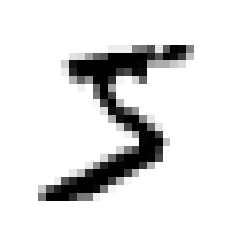

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

first_digit_info = X[0]
first_digit_image = first_digit_info.reshape(28,28)

plt.imshow(first_digit_image, cmap='binary')
plt.axis("off")

In [14]:
first_digit_label = y[0]
first_digit_label

'5'

We see that the image does indeed look like a '5'! Something to note is that the label is actually a string whereas ML algorithms take numbers as input. As such, we will convert the labels to integers

In [15]:
import numpy as np

y = y.astype(np.uint8)

Finally, we must split our data into a training set and test set. It turns out that the MNIST data set is already split for us, where the training set consists of the first 60,000 images and the test set the last 10,000 images.

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Training a Binary Classifier**

As is common in problem solving (and mathematical thinking), the first thing we will do is simply create a 'binary classifier' and only attempt to identify whether an image depicts the number 5 or not.

To start, we need to make a new feature with corresponding labels for the 5 and non-5 digits.

In [17]:
# Making a binary tuple for labelling 5 and non-5 digits

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [19]:
y_test_5

array([False, False, False, ..., False,  True, False])

As the ML algorithm, we will experiement with the "Stochastic Gradient Descent" classifier (SGD). This classifier provides the advantage of being able to handle very large data sets efficiently (it looks at each training instance one at a time).

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Now let's use it to make predictions:

In [21]:
sgd_classifier.predict(X_test[:20])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

In [22]:
y_test_5[:20]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False])

We see that it only made one mistake in this set of 20 prediction! That's pretty good, but let's investigate its performance more carefully.

## Performance Measures of Classifiers

It so happens that evaluating the performance of a classifier ML model is much more involved than for a regression ML model (you can't simply use a single RMSE value!). So we will spend the rest of our time looking at different performance measures.

**Measuring Accuracy Using Cross-Validation**

As we will see, using 'accuracy' as a performance measure for classification tasks is not good.

As always, cross-validation is a good technique for evaluating a model's performance. We will split our training data into $K=3$ folds.

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier,
                X_train,
                y_train_5,
                cv=3,
                scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

So it appears that our model has over 95% accuracy on all the cross-validation folds! This is actually deceptive, since if we were to make a classification ML model that simply predicts EVERY instance to be a non-5, this would result in 90% accuracy! (Because each digit 0,1,...,9 occurs in the same overall ratio, hence there is 9/10 chance of getting a non-5).

Here is some basic code below to illustrate this:

In [24]:
from sklearn.base import BaseEstimator

class Non5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_classifier = Non5Classifier()

In [26]:
cross_val_score(estimator = never_5_classifier,
                X = X_train,
                y = y_train_5,
                scoring = "accuracy",
                cv = 3)

array([0.91125, 0.90855, 0.90915])

Indeed, we get above 90% accuracy on each K-fold, as expected.

THUS: We see that using 'accuracy' as a performance measure is not informative with classification tasks. This is more generally true with *skewed data sets* (when some labels are more frequent than others).

So, let's learn about other performance measures that are more useful with classification tasks.

**Confusion Matrix**

The **confusion matrix** is a good performance measure for classification tasks. It provides us with counts, in the form of a matrix, of the number of times an input instance (actual value) was classified per each label (predicted value). Each row represents an actual class, and each column represents the model's prediction class.

The confusion matrix is essentially a numerical representation of how many times a ML model got "confused" and made an incorrect prediction.

In order to construct a confusion matrix, you simply need to input the predictions along with the target labels. **One way to make predictions without using the test set is to use SKL's 'cross_val_predict()' method.** This performs K-fold cross-validation and returns the actual predictions (instead of the evaluation scores, as 'cross_val_score()' would.

In [27]:
from sklearn.model_selection import  cross_val_predict

y_train_predictions = cross_val_predict(estimator=sgd_classifier,
                                       X=X_train,
                                       y=y_train_5,
                                       cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_train_5,
                y_pred = y_train_predictions)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

As mentioned above, the rows represent the **actual class**, and the columns represent the **predicted class**. First, here is a description of the structure of the confusion matrix:

* *non-5* images are considered the **negative** class (first row/column)
* *5* images are considered the **positive** class (second row/column)


* The first row represents the actual class of *non-5* images
* The second row represents the actual class of *5* images


* The first column represents the predicted class of *non-5* images
* The second column represents the predicted class of *5* images

Here is the interpretation of each of the four entries:

* (1,1)-entry -> Number of non-5 images that were **correctly** predicted to be non-5 images (called **true negatives**)
* (1,2)-entry -> Number of non-5 images that were **incorrectly** predicted to be 5 images (called **false positives**, **false alarm**, **Type I error**)
* (2,1)-entry -> Number of 5 images that were **incorrectly** predicted to be non-5 images (called **false negatives**, **miss**, **Type II error**)
* (2,2)-entry -> Number of 5 images that were **correctly** predicted to be 5 images (called **true positives**)

We can visualize this terminology in the matrix visual below:


---| Neg | Pos
---|------|------
Neg | TN | FP
Pos | FN | TP



Now, we can interpret the entry values:

* 53,892 non-5 images were correctly classified as being non-5 images
* 687 non-5 images were **in**correctly classified as being 5 images
* 1891 5 images were **in**correctly classified as being non-5 images
* 3530 5 images were correctly classified as being 5 images

**Note:** A *perfect* classifier ML model would yield a confusion matrix that is diagonal (only true negatives and true positives)

Next, we can use the entries of a confusion matrix, $TN, FP, FN, TP$, to compute other useful summary metrics.

The first one we look at is called **precision** (aka: **positive predictive value**). This is a measure of the accuracy of our model to make positive predictions. It is an answer to the question **out of all the positive predictions, what percentage of these predictions were true**. The formula is:

$$ \operatorname{PPV} = \operatorname{precision} = \frac{TP}{TP+FP} $$

The precision metric is commonly used alongside another metric called **recall** (aka: **sensitivity**, **true positive rate**, **hit rate**). This is an answer to the question **for all of the positive input instances, what percentage were predicted correctly**. The formula is:

$$ \operatorname{TPR} = \operatorname{recall} = \frac{TP}{TP+FN} $$

As usual, SKL provides us with built-in functions to calculuate these values automatically:

In [29]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true=y_train_5,
                y_pred = y_train_predictions)

recall = recall_score(y_true=y_train_5,
                y_pred = y_train_predictions)

In [30]:
precision

0.8370879772350012

In [31]:
recall

0.6511713705958311

Using these performance measures, we see that precision is ~0.837. This means that, of the images the ML model predicted to be a 5, only ~83.7 were actually a 5. In other words, there is ~83.7% chance the ML model will **correctly** predict a 5.

We also see that recall is ~0.651. This means that, amongst all the 5 images, only ~65.1% were actually detected to be a 5.

In practice, the precision and recall are usually combined into a single metric called the **$F_1$ score** which is simply the harmonic mean of the precision and recall. This is useful if you need to **compare two different classifiers**. The formula for the F1-score is:

$$\frac{2}{F_1} = \frac{1}{\operatorname{precision}} + \frac{1}{\operatorname{recall}}$$

The benefit of using the harmonic mean is that low values of precision or recall have little affect on the F1 score. As such, one will only observe a high F1 score if **both** precision and recall are high.

As usual, we can use SKL to compute the F1 score for us:

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true=y_train_5,
                y_pred = y_train_predictions)

In [33]:
f1

0.7325171197343846

So we see that our classifier as an F1 score of ~0.733.

Depending on the context, you may care more about precision or more about recall. Here are two examples:

1. Suppose you are creating a ML model to classify safe YouTube videos for kids. In this case, it is preferable to want high precision with indifference to (low) recall. Indeed, out of all the YouTube videos **that your model said were safe**, you want a high percentage of these to actually be safe! With low recall, your model may not detect ALL the safe YouTube videos (but it's better to be safe than sorry!)

2. Suppose you are creating a ML model to classify shoplifters in a mall. In this case, it is preferable to want high recall with indifference to (low) precision. Indeed, **out of all the shoplifters that exist**, you want your model to correctly identify them. With low precision, your model may have mistaken a non-shoplifter to be a shoplifter (i.e. a false alarm), but this is the price to pay for getting all the shoplifters!

Unfortunately, as is the case with most things in coding and data science, there is a trade-off between precision and recall.

**Precision/Recall Trade-Off**

It's not possible to increase both precision and recall simultaneously; one must choose which one they prefer, or somehow find a balance between the two metrics. Here are their respective formulas for reference:

$$ \operatorname{PPV} = \operatorname{precision} = \frac{TP}{TP+FP} 
\quad\quad \operatorname{TPR} = \operatorname{recall} = \frac{TP}{TP+FN}$$

To understand why this is the case, we can look under-the-hood of the 'SGDClassifier' to see how it works. 

Ultimately, this classifier takes as input an image and then must make a decision on whether to classify it as negative (non-5) or positive (5). To make this decision, it uses something called a **decision function** to compute a score for that image. If the score (computed by the decision function) is greater than some specified threshold, the classifier will classify the image as a positive, else a negative.

We can visualize every single image on a scale listed in increasing order of their score. The decision threshold is placed somewhere on this scale, hence all images to the right are classified as positive, and to the left as negative.

Now, if you choose to **increase** this decision threshold, some FPs will become TNs hence the precision increases (*precision denominator decreases*; NOTE: it's also sometimes possible that precision may decrease sometimes). BUT: At the same time, some TPs will become FNs hence the recall decreases (*recall denominator increases*; NOTE: the recall can only decrease). The opposite effect will occur if you **decrease** the decision threshold.

So this begs two questions:

1. **How can we specify the decision threshold in our ML model?** 
2. **How do we choose a decision threshold?**

As it happens, SKL does not allow us to do this directly (it is 0 by default), but it does give us access to the scores via the '.decision_function()' method. This will return the scores for any input instance, and then you can create and implement your own decision function.

In [34]:
# Computing decision score for the first image in the training set

first_images_score = sgd_classifier.decision_function([X[0]]) # Input must be a 2D array!
first_images_score

array([2164.22030239])

In [35]:
# Computing decision scores for the first 10 images

first_10_scores = sgd_classifier.decision_function(X[:10])
first_10_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779,  -4623.84515943,
        -6873.05248453,  -3908.27576291,  -4851.9422397 ,  -4988.52407755,
        -2226.78132866,  -4081.33692831])

Now, we can manually specify a threshold and make predictions!

In [36]:
threshold = 5000

first_10_predictions = (first_10_scores > threshold)
first_10_predictions

array([False, False, False, False, False, False, False, False, False,
       False])

Now, how do we **what decision threshold to use?** To make an educated guess, we first get the decision scores for our entire training data set. Then, we can visualize the precision and recall using a graph, both as functions of the threshold. Using this graph will help us to make an educated guess as to what threshold value we should use.

And, to compute the decision scores, we of course still use cross validation but this time specify that the method be 'decision_function'.

Let's do it!

In [37]:
# Computing scores for entire training set

y_scores = cross_val_predict(estimator=sgd_classifier,
                            X=X_train,
                            y=y_train_5,
                            cv=3,
                            method='decision_function')

Next, we use 'precision_recall_curve()' which will compute the precision and recall for *all possible thresholds*

In [38]:
# NOTE: "this implementation is restricted to the binary classification task" !!!

from sklearn.metrics import precision_recall_curve

precision_array, recall_array, threshold_array = precision_recall_curve(y_true = y_train_5, # True binary labels
                      probas_pred = y_scores) # Estimated probabilities OR decision function

Finally, we use matplotlib to visualize the precision and recall as functions of the threshold.

recall_90_precision =  0.4799852425751706
threshold_90_precision =  3370.0194991439557


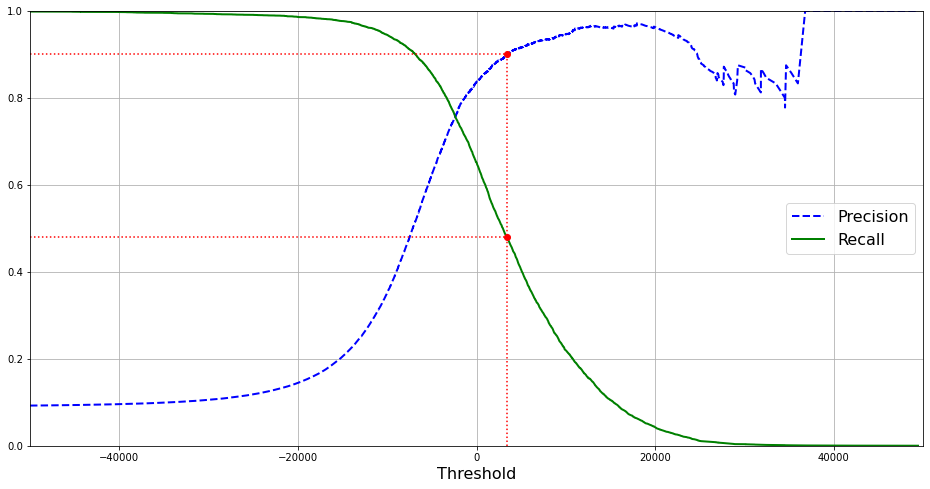

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recall_array[np.argmax(precision_array >= 0.90)]
threshold_90_precision = threshold_array[np.argmax(precision_array >= 0.90)]

print("recall_90_precision = ", recall_90_precision)
print("threshold_90_precision = ", threshold_90_precision)


plt.figure(figsize=(16, 8))                                                                  
plot_precision_recall_vs_threshold(precision_array, recall_array, threshold_array)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
# save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

In the graph above, we see that in order to have 90% precision, we are forced to accept a recall of ~48%. The threshold for these values of precision and recall is ~3370.

Another way to determine what precision and recall values to use is to plot them against each other, as shown below:

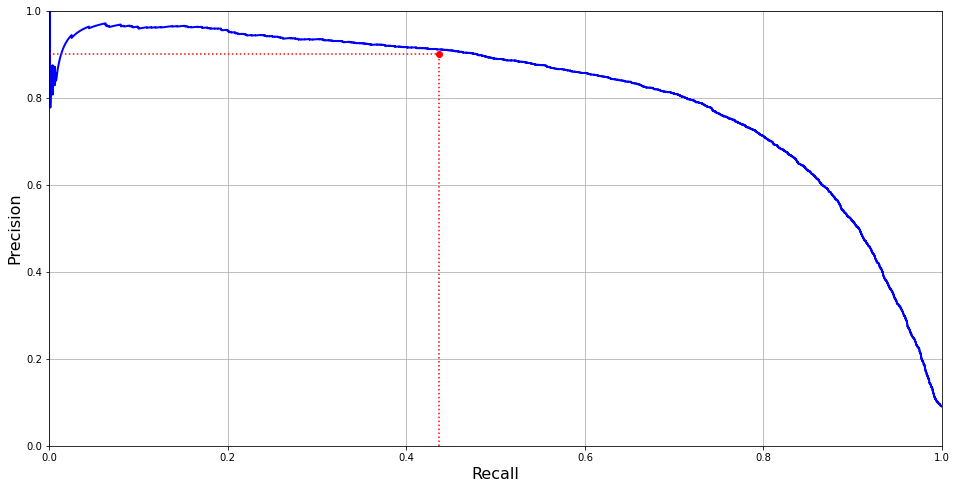

In [40]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(16, 8))
plot_precision_vs_recall(precision_array, recall_array)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

In this graph, we have identified the point where the threshold has the same value of ~3370 for reference.

We see that the precision starts to drop rapidly at about 70% - 80%. So a good choice for the precision/recall trade-off would be to select a value for precision just before this drop. As an example, you could select precision to be ~80% and hence the recall would be ~73%.

**Note:** This curve indicates a better classifier if it is located more towards the top-right corner.

Now, suppose the we have decided that an acceptable value for precision is 80%. We can compute the associated threshold and recall values as follows:

In [41]:
precision = 0.8

# Finds the first index for the maximum value (i.e. "True" value)
max_value_index = np.argmax(precision_array >= precision)

threshold_90_precision = threshold_array[max_value_index]
recall_90_precision = recall_array[max_value_index]

print("Threshold = ", threshold_90_precision)
print("Recall = ", recall_90_precision)

Threshold =  -1328.4125766562406
Recall =  0.7127836192584394


Finally, to make predictions, we just use this as our decision threshold:

In [42]:
y_train_predictions_80_precision = (y_scores >= threshold_90_precision)

And we can double-check the values for precision and recall:

In [43]:
precision_score(y_true=y_train_5,
                y_pred = y_train_predictions_80_precision)

0.8

In [44]:
recall_score(y_true=y_train_5,
                y_pred = y_train_predictions_80_precision)

0.7127836192584394

In [45]:
confusion_matrix(y_true=y_train_5,
                y_pred = y_train_predictions_80_precision)

array([[53613,   966],
       [ 1557,  3864]], dtype=int64)

**IMPORTANT NOTE: A high precision classifier is not very useful if the recall is too low! So, when your boss tells you "hey...I want a 99% precision classifier", you can ask her "at what recall?"**.

**The ROC Curve**

Another common tool used with binary classifiers is the **receiver operating characteristic (ROC) curve**. To understand what this is, we first define some new terminology. Here are some references:

$$ \operatorname{PPV} = \operatorname{precision} = \frac{TP}{TP+FP} 
\quad\quad \operatorname{TPR} = \operatorname{recall} = \frac{TP}{TP+FN}$$

---| Neg | Pos
---|------|------
Neg | TN | FP
Pos | FN | TP





The **false positive rate** (aka: **fall-out**, **false alarm ratio**) is a metric that answers the question **for all the negative instances, what percentage are incorrecly classified as being positive**. The formula for the FPR is:

$$ \operatorname{FPR} = \operatorname{fall-out} = \frac{FP}{TN+FP} $$

The **true negative rate** (aka: **specificity**, **selectivity**) is a metric that answers the question **for all the negative instances, what percentage are correctly classified as being negative**. The formula for TNR is:

$$ \operatorname{TNR} = \operatorname{specificity} = \frac{TN}{TN+FP} $$

The relationship between FPR and TNR is: $\operatorname{FPR} + \operatorname{TNR} = 1$

Finally, the **ROC curve** is a plot of $\operatorname{TPR}$ vs. $\operatorname{FPR}$, or equivalently, recall vs. FPR (or equivalently: recall vs. 1-specificity).

We can use SKL's 'roc_curve()' function to compute the TPR and FPR values for various thresholds, then plot the ROC curve.

In [46]:
from sklearn.metrics import roc_curve

fpr_array, tpr_array, threshold_array = roc_curve(y_true=y_train_5,
                                                  y_score = y_scores)

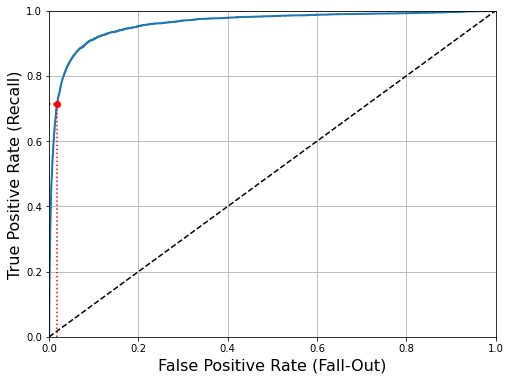

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

fpr = 966/(53613+966)

plt.figure(figsize=(8, 6))                  
plot_roc_curve(fpr_array, tpr_array)
plt.plot([fpr, fpr], [0., 0.71278], "r:") 
plt.plot([0.0, fpr], [0.71278, 0.71278], "r:")  
plt.plot([fpr], [0.71278], "ro")               
# save_fig("roc_curve_plot")                         
plt.show()

The red circle denotes the point where our recall (TPR) is ~71.3% (as was defined by our choice of 80% precision).

In this figure, we see that as the TPR increases, the FPR begins to increase very rapidly, meaning the classifer is producing more false positives (alongside us trying to produce more true positives).

The diagonal dotted line represents a random classifier and is used as a reference. In general, a good classifier will stay as far away from this dotted line as possible (so more toward the top-left corner of the plot).

As such, we can use the ROC curve to assess the performance of our classifier by computing the **area under the ROC curve**. A perfect classifier will have area 1 and a purely random classifier (depicted by the diagonal dashed line) will have area 0.5.

We can use SKL's 'roc_auc_score()' function to compute this area:

In [48]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true=y_train_5, 
                    y_score = y_scores)

In [49]:
auc

0.9604938554008616

**Note:** The ROC and precision/recall (PR) curves are very similar. To decide which one to use, we use the rule-of-thumb where we **prefer to use the PR curve when the positive class is rare OR when you care more about false positives than false negatives.** Otherwise, we use the ROC curve.

This is because the ROC curve is biased for data that has few positive instances, and will give you misleading measures of performance.

**Comparing Multiple Binary Classifiers**

We can compare multiple classifiers by either graphing their ROC curves on the same plot (to qualitatively compare), or by computing the areas under their ROC curves (quantitatively compare).

Let's create a random forest classifier model to see how it compares with our stochastic gradient descent model we currently have.

The first step is to get the scores that a random forest model would assign to each image instance. As it so happens, the 'RandomForestClassifier' does not come equipped with the same "decision_function()" method we used for the SGDClassifier. It instead comes equipped with the 'predict_proba()' method, which returns a 2D-array where each row corresponds to an instance, and each column corresponds to a class. The values are the probabilities that a given instance will belong to some class.

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)
y_probabilities_forest = cross_val_predict(estimator=forest_classifier,
                                          X=X_train,
                                          y=y_train_5,
                                          cv=3,
                                          method="predict_proba")

In [51]:
y_probabilities_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

As it happens, althought the 'roc_curve()' method takes in scores as the second parameter, we can also use probability estimates (which we have coincidentally computed above!). We will use the positive probabilities (values in column 2):

In [52]:
y_scores_forest = y_probabilities_forest[:, 1]
print(y_scores_forest)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_true=y_train_5,
                                                      y_score = y_scores_forest)

[0.89 0.01 0.04 ... 0.98 0.08 0.06]


In [53]:
# Trying to make the confusion matrix so that I can compute TPR to plot the
# red dot properly on the graph below

my_predictions = []
for instance in y_probabilities_forest:
    index = np.argmax(instance)
    
    if index == 0:
        my_predictions.append(False)
    else:
        my_predictions.append(True)

confusion_matrix(y_true=y_train_5,
                 y_pred = my_predictions)

array([[54534,    45],
       [  725,  4696]], dtype=int64)

Finally, we will plot the ROC curves for both our SGD and random forest models:

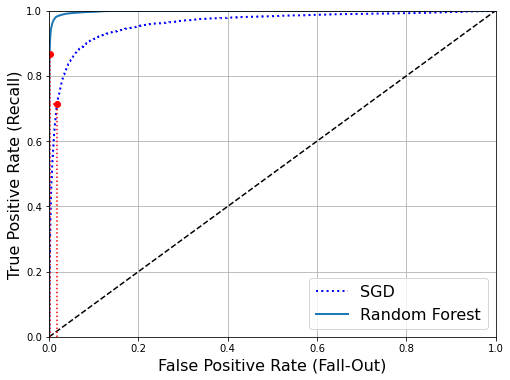

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_array, tpr_array, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.plot([fpr, fpr], [0., 0.71278], "r:") 
plt.plot([0.0, fpr], [0.71278, 0.71278], "r:")  
plt.plot([fpr], [0.71278], "ro")

# Can't get the TPR red dot to work ????
#tpr = 4696/(4696+725) # = 0.8662608374838591


# fpr_forest = 45/(45+54534) # = 0.000824492936843841

plt.plot([0.000824492936843841, 0.000824492936843841], [0., 0.8662608374838591], "r:")
plt.plot([0.000824492936843841], [0.8662608374838591], "ro")



 





plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

As we can see, the random forest classifer performs much better than the SGD classifier! Indeed, we can verify this by computing the areas under the respective ROC curves:

In [55]:
auc_sgd = roc_auc_score(y_true=y_train_5, 
                    y_score = y_scores)

auc_forest = roc_auc_score(y_true=y_train_5,
                           y_score = y_scores_forest)

print("SGD area = ", auc_sgd)
print("Forest area = ", auc_forest)

SGD area =  0.9604938554008616
Forest area =  0.9983436731328145


Further, let's compute the precision and recall for the random forest classifer. In order to do this, we first need to make predictions, then we can do these computations:

In [56]:
y_train_predictions_forest = cross_val_predict(estimator=forest_classifier,
                                               X=X_train,
                                               y=y_train_5,
                                               cv=3)

In [57]:
confusion_matrix(y_true = y_train_5,
                y_pred = y_train_predictions_forest)

array([[54534,    45],
       [  725,  4696]], dtype=int64)

In [58]:
precision_score(y_true = y_train_5,
                y_pred = y_train_predictions_forest)

0.9905083315756169

In [59]:
recall_score(y_true = y_train_5,
                y_pred = y_train_predictions_forest)

0.8662608374838591

So, our random model provides us with a precision of ~99.05% at a recall of ~86.63%. This is much better than the original SGD model!

**Summary of Binary Classification**

We have went through the general steps of a binary classification task. Here is the summary:
1. Choose the appropriate metric (we didn't do this????)
2. Evaluate classifiers using cross-validation
3. Select the precision/recall trade-off that fits your needs
4. Use PR and ROC curves to compare various classifiers

The next step to generalize this process is to be able to classify images into multiple classes...

## Multi-class Classification